# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The problem addressed here is how can HR Team offer a salary to new candidate within an acceptable ranges which is beneficial for the company.

In [63]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import math
import warnings
warnings.filterwarnings('ignore')

#your info here
__author__ = "Ashish Mishra"
__email__ = "ashishmishra2k19@gmail.com"

## Part 2 - DISCOVER

### ---- 2.1 Load the data ----

In [64]:
#load the data into a Pandas dataframe
train_features = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\DSDJ-data-SalaryPredictions\\data\\train_features.csv")
test_features = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\DSDJ-data-SalaryPredictions\\data\\test_features.csv")
train_salaries = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\DSDJ-data-SalaryPredictions\\data\\train_salaries.csv")


### 2.2 Examine the data

In [65]:
# Checking first 10 columns of train_features data
train_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [66]:
# Checking first 10 columns of test_features data
test_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


It can be seen that the features in both Train and Test are same so there is no nedd to delete any feature in Train dataset.

In [67]:
# Checking first 10 columns of train_salaries data
train_salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


### 2.3 Merge feature and Target variable into one dataframe.

In [68]:
train = pd.merge(train_features, train_salaries, on='jobId')

In [69]:
del train_features
del train_salaries

In [70]:
# Checking the first 10 columns of Combined dataframe
train.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


### 2.4 Checking Shape and Info of Combined data

In [71]:
print("Shape of Combined data is:" ,train.shape)

Shape of Combined data is: (1000000, 9)


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### ---- 3 Clean the data ----

In [73]:
# Checking for Duplicate values in combined data frame.
train.duplicated().sum()

0

It can be seen that there is no duplicate value, so need to do anything here.

In [74]:
#Checking for missing Values.
train.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

There is no missing value as well.

### ---- 4 Explore the data (EDA) ----

#### 4.1 Summarizing the Numerical and Categorical Variable seperately

In [14]:
# Summarizing only Numerical variable
train.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


It can be seen that the minimum salry is 0 in the dataset. Which we have to deal with in later stage.

In [15]:
# Summarizing Categorical variable
train.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684432036,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


#### 4.2 Visualizing Target Variable(Salary)

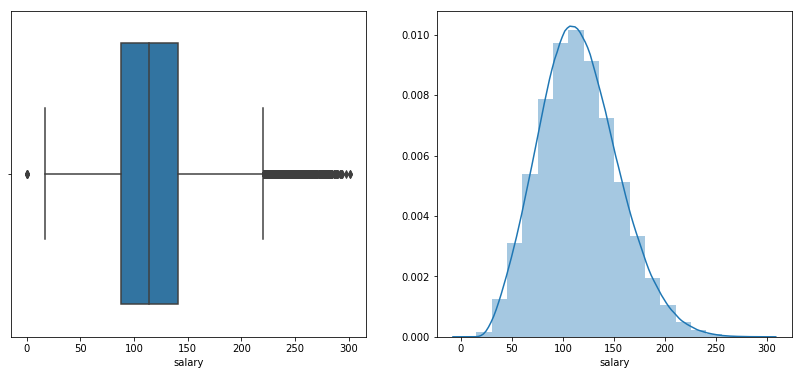

In [16]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train.salary)
plt.subplot(1,2,2)
sns.distplot(train.salary, bins=20)
plt.show()

1. It can be seen that there are some potential Outliers which we have to deal with.
2. The Distribution of Salry is looks like normal distribution, will confirm with Skewness.

##### 4.3 Checking Skewness and Kurtosis of Target Variable

In [17]:
#skewness and kurtosis
print("Skewness: %f" % train['salary'].skew())
print("Kurtosis: %f" % train['salary'].kurt())

Skewness: 0.346415
Kurtosis: -0.025579


It can be seen that the Skewness is less than 0.5, we can conclude that the distribution is normal for Target variable i.e salary

#### 4.4 Dealing with Outliers in Target Variable

##### Using IQR to detect and Remove Outlier

In [18]:
st=train.salary.describe()
print(st)
IQR = st['75%'] - st['25%']
outlier_upper_bound = st['75%'] + 1.5 * IQR
outlier_lower_bound = st['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspicious outliers are {} and {}, respectively.'.format(outlier_upper_bound, outlier_lower_bound))


count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspicious outliers are 220.5 and 8.5, respectively.


###### Examine Potential Outlier

In [19]:
# Outliers below the lower bound
train[train.salary < outlier_lower_bound]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


It can be seen that these are the instances of missing data as when we look at the years of experience columns, all having high years of experience hence must drawn sum salary.We drop this missing values later.

In [20]:
# Outliers above the upper bound
train.loc[train.salary > outlier_upper_bound, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

All these are senior level roles, all the way from CEO down to SENIOR, and it is reasonable that they earn lot of money. However, why candidates in JUNIOR roles should earn high salaries? This needs further investigation to make sure if it is genuine and correct data or should these be dropped from the dataset.

In [21]:
train[(train.salary > outlier_upper_bound) & (train.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


It can be seen that all of these having high years of experiences and most of them belongs to Fibance and Oil Industry and Usually they pay more. So these values are pritty reasonable for me.

##### Removing Data with 0 salary

In [22]:
train = train[train.salary > outlier_lower_bound]

In [23]:
# Checking the stats again
train.salary.describe()

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64

We confirmed that the 0 salary is removed now.

#### 4.5 Checking Relationship between Dependent and Independent Variable with Visualization

##### Making Hypothesis for Visualization.
 We make some Hypothesis regarding Relationship between Dependent and Independent Variable.
 1. There will be some Positive relationship between Years of Experience and Salry
 2. There will be some negative relationship between miles from metroolis and Salary.
 3. There will be some relationship between Degree and Salary.
 4. There will be some relationship between Jobtype and salary.

We will hypothesize each of above by Some visualization

Text(0.5,1,'Years of Experience VS Salary')

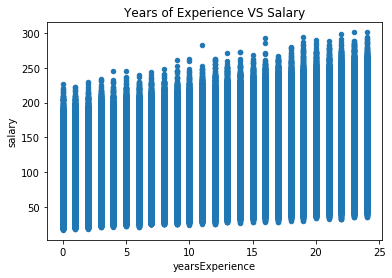

In [24]:
# Year of Experience VS Salary
train.plot(kind = 'scatter',x='yearsExperience',y='salary')
plt.title('Years of Experience VS Salary')

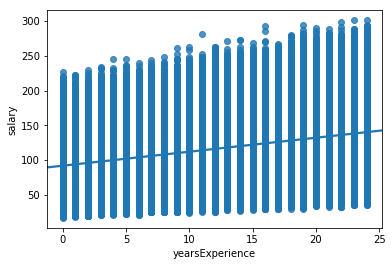

In [135]:
ax = sns.regplot(x="yearsExperience", y="salary", data=train)

It can be seen that there is some positive linear relationship between Years of experience and Salary.

Text(0.5,1,'milesFromMetropolis VS Salary')

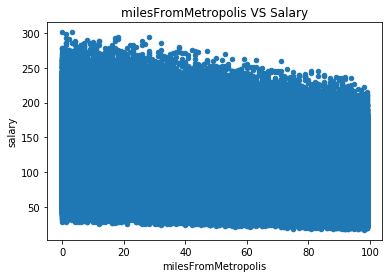

In [66]:
# MilesFromMetropolis VS Salary
train.plot(kind = 'scatter',x='milesFromMetropolis',y='salary')
plt.title('milesFromMetropolis VS Salary')


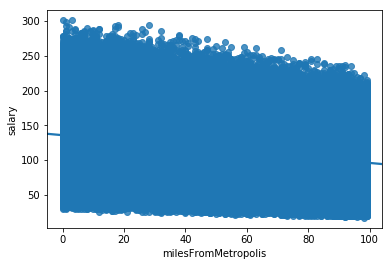

In [73]:
ax = sns.regplot(x="milesFromMetropolis", y="salary", data=train)

It can be seen that there is some negative relationship between milesFromMetropolis and Salry, which is very reasonable as we from metropolis the salary tends to decreases.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

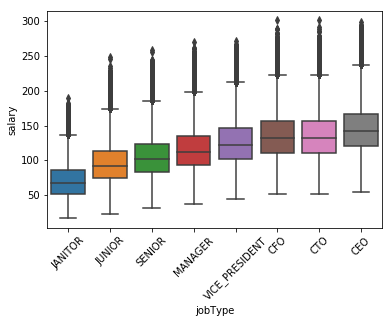

In [84]:
# JobType VS Salary
sns.boxplot(x="jobType", y="salary", data = train.sort_values("salary", ascending = True))
plt.xticks(rotation=45)

It can be seen that as the JobType goes on higher position, Salary tends to increase.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

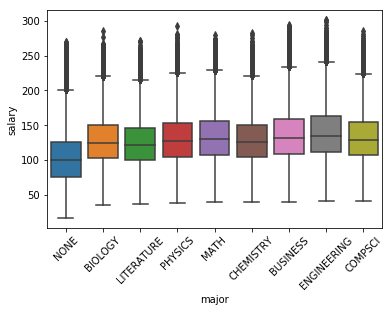

In [85]:
# Major VS Salary
sns.boxplot(x="major", y="salary", data = train.sort_values("salary", ascending = True))
plt.xticks(rotation=45)

It can be seen that there is some relationship between Major and Salry.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

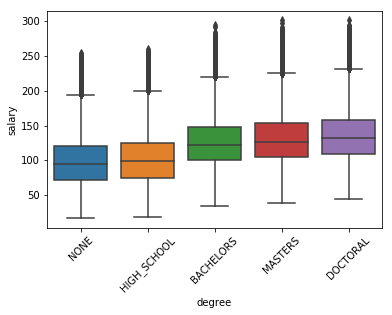

In [87]:
# Degree VS Salary
sns.boxplot(x="degree", y="salary", data = train.sort_values("salary", ascending = True))
plt.xticks(rotation=45)

It can be seen that higher the degree is higher is the Salary.


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

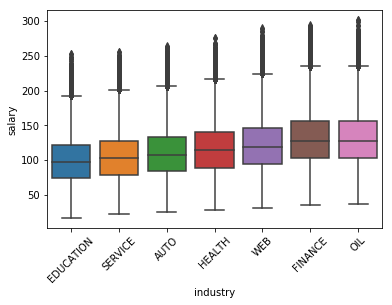

In [88]:
# Industry VS Salary
sns.boxplot(x="industry", y="salary", data = train.sort_values("salary", ascending = True))
plt.xticks(rotation=45)

It can be seen that Finance and Oil Industry are paying more.

### 4.6 Categorical Encoding.

##### Degree and JobType are Ordinal data. We convert this by Label Encoding.

In [75]:
# Making Copy of Original Data Set
train_df = train.copy()

In [76]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [77]:
# Converting Degree
mapping = {"NONE":1,
          "HIGH_SCHOOL":2,
          "BACHELORS":3,
          "MASTERS":4,
          "DOCTORAL":5}
train_df['degree'] = train_df['degree'].map(mapping)


In [78]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,4,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,2,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,5,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,5,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,3,PHYSICS,FINANCE,8,16,163


In [79]:
# Converting Job Type
mapping_jb = {"JANITOR":1,
             "JUNIOR":2,
             "SENIOR":3,
             "MANAGER":4,
             "VICE_PRESIDENT":5,
             "CFO":6,
             "CTO":7,
             "CEO":8}
train_df['jobType'] = train_df['jobType'].map(mapping_jb)

In [80]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,6,4,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,8,2,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,5,5,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,4,5,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,5,3,PHYSICS,FINANCE,8,16,163


##### Will change Industry and Major by One Hot Encoding

In [81]:
# Changing Industry and Major
Industry = pd.get_dummies(train_df['industry'],drop_first=True)
Major = pd.get_dummies(train_df['major'],drop_first=True)

In [82]:
train_df = pd.concat([train_df,Industry,Major],axis=1)

In [83]:
train_df =train_df.drop(columns=['major','industry'])

In [84]:
train_df.head(10)

,jobId,companyId,jobType,degree,yearsExperience,milesFromMetropolis,salary,EDUCATION,FINANCE,HEALTH,...,SERVICE,WEB,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
0,JOB1362684407687,COMP37,6,4,10,83,130,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,JOB1362684407688,COMP19,8,2,3,73,101,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,JOB1362684407689,COMP52,5,5,10,38,137,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,JOB1362684407690,COMP38,4,5,8,17,142,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,JOB1362684407691,COMP7,5,3,8,16,163,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,JOB1362684407692,COMP15,4,5,2,31,113,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6,JOB1362684407693,COMP15,6,1,23,24,178,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,JOB1362684407694,COMP24,2,3,9,70,73,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,JOB1362684407695,COMP20,1,2,1,54,31,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,JOB1362684407696,COMP41,5,3,17,68,104,0,0,0,...,0,0,0,1,0,0,0,0,0,0


###### Will drop the irrelevant Columns JobId and Company Id also

In [85]:
train_df = train_df.drop(columns=['jobId','companyId'])

In [36]:
train_df.head(10)

,jobType,degree,yearsExperience,milesFromMetropolis,salary,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
0,6,4,10,83,130,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,8,2,3,73,101,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,5,5,10,38,137,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,4,5,8,17,142,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,3,8,16,163,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,4,5,2,31,113,0,1,0,0,0,0,0,0,1,0,0,0,0,0
6,6,1,23,24,178,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7,2,3,9,70,73,1,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,2,1,54,31,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9,5,3,17,68,104,0,0,0,0,0,0,0,1,0,0,0,0,0,0


###### 4.7 Checking the Correlation 

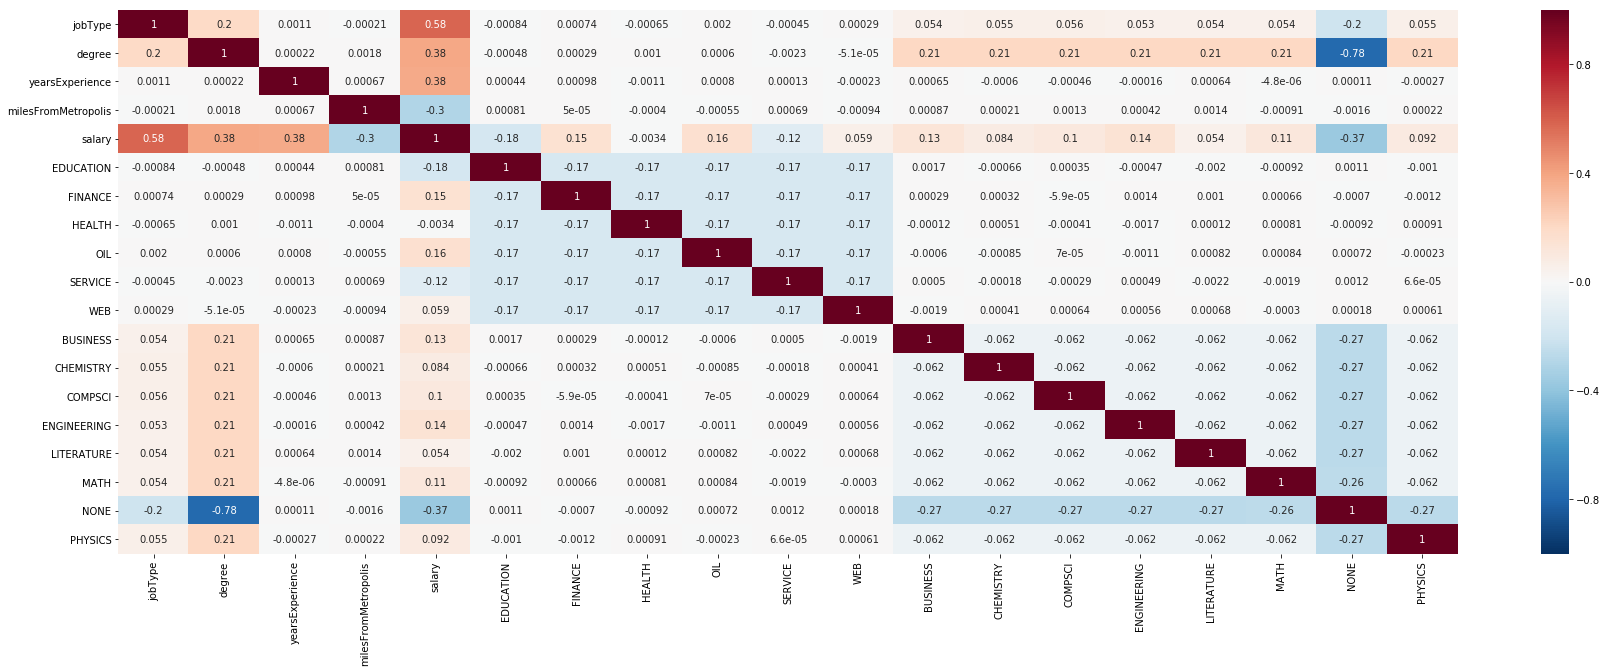

In [37]:
correlation = train_df.corr()
plt.figure(figsize=(30, 10))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [38]:
correlation['salary'].sort_values(ascending=False)

salary                 1.000000
jobType                0.578922
degree                 0.384044
yearsExperience        0.375013
OIL                    0.156966
FINANCE                0.154853
ENGINEERING            0.144203
BUSINESS               0.126123
MATH                   0.110413
COMPSCI                0.102986
PHYSICS                0.092056
CHEMISTRY              0.084044
WEB                    0.058953
LITERATURE             0.053918
HEALTH                -0.003445
SERVICE               -0.122370
EDUCATION             -0.175158
milesFromMetropolis   -0.297686
NONE                  -0.371435
Name: salary, dtype: float64

##### It can be seen that jobType, degree, and Years of Experience having high correlation with salary.

In [40]:
train_df.shape

(999995, 19)

### ---- 5 Establish a baseline ----

In [41]:
# select a reasonable metric (MSE in this case)
# create an extremely simple model and measure its efficacy
# e.g. use "average salary" for each industry as your model and then measure MSE
# during 5-fold cross-validation
# add average 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
    
#train_data_clean['salary'] = np.log1p(train_data_clean['salary'])
salary_pred = train_df['salary']
k_folds = KFold(n_splits=5)
mean_squared_error_folds = []

for train, test in k_folds.split(salary_pred):
    
    # load train salary data
    train_salary = salary_pred.iloc[train]
    
    # generate average for train data
    average_salary = np.empty(len(train_salary))
    average_salary.fill(np.average(train_salary))
    
    # print the mean squarred error
    mean_squared_error_folds.append(mean_squared_error(train_salary, average_salary))
    #mean_squared_error(train_salary, average_salary)
    
print(np.average(mean_squared_error_folds))


1499.0164884086148


### ---- 6 Hypothesize solution ----

The baseline model predicts the salary based on the data provided without fitting, feature generation or tunning.

Supervised Machine Learning algorithms will be used to improve the prediction results. Regression and Ensembles of Regression Algorithms suit our data and goal. 3 models that may improve results over the baseline model given the above EDA:

1.LinearRegression - Sometimes simple is best
2.RandomForestRegressor - Improved accuracy and control over-fittings
3.GradientBoostingRegressor - Can optimise on Least Squares regression.



## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Create models ---- AND Test Models

In [95]:
train_data = train_df.drop('salary',axis=1)
target = train_df['salary']

##### Metric used for Model is MSE.

In [96]:
#initialize model list and dicts
models = []
mean_mse = {}
cv_std = {}

In [97]:
def Model_Training(model,X_train,y_train, mean_mse, cv_std):
    print("Trained model name:",model)
    neg_mse= cross_val_score(model,X_test,y_test,cv=5,scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])

Define Linear Regression, Random Forest and Gradient Boosting

In [100]:
from sklearn.model_selection import cross_val_score,train_test_split
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=200, n_jobs=2, max_depth=30, \
                           min_samples_split=60, max_features='auto', verbose=0)
gbr = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls',verbose=0)
models.extend([lr, rf, gbr])

print("Beginning cross validation")
for model in models:
    X_train, X_test, y_train, y_test= train_test_split(train_data,target,test_size=0.3,random_state=0)
    Model_Training(model, X_train, y_train, mean_mse, cv_std)

Beginning cross validation
Trained model name: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Average MSE:
 393.4717436953356
Standard deviation during CV:
 2.1222912981929127
Trained model name: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=60,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=2,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Average MSE:
 372.3167821213066
Standard deviation during CV:
 1.5836994272478535
Trained model name: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samp

### ---- 8 Select best model  ----

In [101]:
#choose model with lowest mse
model = min(mean_mse, key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print(model)


Predictions calculated using model with lowest MSE:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=160, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


Since the MSE is minimum for GradientBoosting Model, We will use it as final model for prediction.

## Part 4 - DEPLOY

In [104]:
#saving the gradient boosting model
import joblib
joblib_file = "GB_salary_model.pkl"
joblib.dump(gbr, joblib_file)

#loading the saved model
model = joblib.load("GB_salary_model.pkl")
print("The model used is:", model)

The model used is: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=160, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


### ---- 11 Automate pipeline ----

In [105]:
# Train Model on Entire Training Set
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=160, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### ---- 12 Deploy solution ----

In [106]:
# Checking the test data
test_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


##### Preporocessing the test data

In [109]:
test_feature = test_features.drop(columns=['jobId','companyId'])

In [110]:
test_feature.head(5)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [111]:
# Converting Degree
test_feature['degree'] = test_feature['degree'].map(mapping)

In [112]:
test_feature['jobType'] = test_feature['jobType'].map(mapping_jb)

In [113]:
test_feature.head(2)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,4,2,NONE,HEALTH,22,73
1,2,1,NONE,AUTO,20,47


In [114]:
Industry_test = pd.get_dummies(test_feature['industry'],drop_first=True)
Major_test = pd.get_dummies(test_feature['major'],drop_first=True)

In [115]:
test_df = pd.concat([test_feature,Industry_test,Major_test],axis=1)

In [116]:
test_df =test_df.drop(columns=['major','industry'])

In [117]:
test_df.head(3)

,jobType,degree,yearsExperience,milesFromMetropolis,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
0,4,2,22,73,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2,1,20,47,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,7,4,17,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [118]:
predictions =pd.DataFrame(model.predict(test_df)) 
test_jobid=pd.DataFrame(test_features['jobId'])
predictions.columns= ["salary"]
prediction_df=pd.concat([test_jobid,predictions],axis=1)

In [119]:
prediction_df.head(10)

,jobId,salary
0,JOB1362685407687,111.406131
1,JOB1362685407688,90.811357
2,JOB1362685407689,177.150465
3,JOB1362685407690,102.073070
4,JOB1362685407691,116.156669
5,JOB1362685407692,153.194975
6,JOB1362685407693,98.479023
7,JOB1362685407694,120.761028
8,JOB1362685407695,107.047118
9,JOB1362685407696,98.164086


In [120]:
#saving the predictions
prediction_df.to_csv('test_salaries.csv')

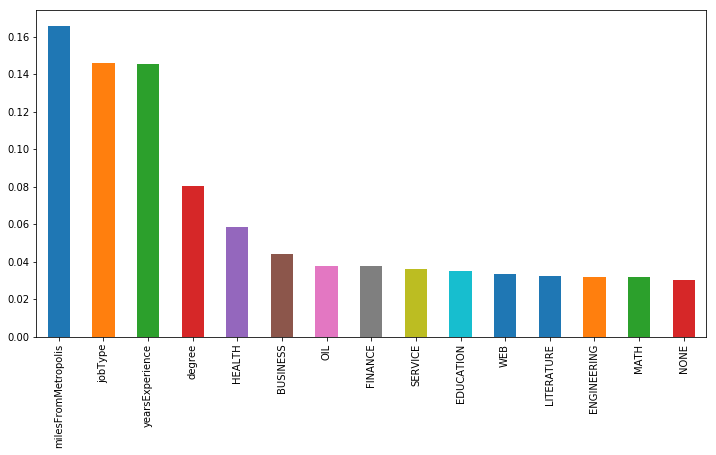

In [127]:
#showing feature importances
importances = pd.Series(model.feature_importances_, index=train_data.columns)
importances.nlargest(15).plot(kind='bar', figsize=(12,6))
plt.show()

#saving feature importances
np.savetxt('model_importances.csv', importances, delimiter=',')

